In [88]:
import pandas as pd

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Data directories
from belly_rubb_analysis.config import INTERIM_DATA_DIR, RAW_DATA_DIR, PROFILE_REPORTS_DIR, FIGURES_DIR

In [89]:
# Load data

trans_df = pd.read_csv(INTERIM_DATA_DIR / 'transactions_interim.csv')
trans_df.head()

,Date,Time,Gross Sales,Discounts,Service Charges,Net Sales,Tax,Tip,Partial Refunds,Total Collected,...,Customer Name,Third Party Fees,Deposit ID,Deposit Date,Deposit Details,Fee Percentage Rate,Fee Fixed Rate,Discount Name,Transaction Status,Order Reference ID
0,2023-11-27,18:11:12,10.89,0.0,0.0,10.89,0.00,0.0,0.0,10.89,...,Emily Samvalian,0.0,3ZQ9S0C1TFZ91SK87PZJCAJYSX1N,2023-11-29,https://app.squareup.com/dashboard/sales/depos...,2.6,0.1,NaN,Complete,NaN
1,2023-11-27,13:37:08,88.56,0.0,0.0,88.56,0.00,0.0,0.0,88.56,...,NaN,0.0,NaN,NaN,NaN,0.0,0.0,NaN,Complete,NaN
2,2023-11-30,16:13:48,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0.00,...,NaN,0.0,NaN,NaN,NaN,0.0,0.0,NaN,Voided,NaN
3,2023-12-05,16:12:32,44.16,0.0,0.0,44.16,4.20,0.0,0.0,48.36,...,Alissa Khachmanyan,0.0,3ZVW7JKH4ZJ10EF4D9BDJ4AJ7TEH,2023-12-05,https://app.squareup.com/dashboard/sales/depos...,2.9,0.3,NaN,Complete,11ee93cbd6b99b0caf423cecef6dbaf0
4,2023-12-07,12:44:33,28.98,0.0,0.0,28.98,2.75,5.8,0.0,37.53,...,Narek Ekmekjyan,0.0,3ZSM1F1BGKWS4Q37A590QHYGH655,2023-12-07,https://app.squareup.com/dashboard/sales/depos...,2.9,0.3,NaN,Complete,11ee9541284203e6af423cecef6dbaf0


# Number of Transactions

In [90]:
# Create dataframe with datetime as index for analysis

time_df = pd.DataFrame({'datetime':pd.to_datetime(trans_df['Date'] + " " + trans_df['Time'])}).set_index('datetime')
time_df

""
datetime
2023-11-27 18:11:12
2023-11-27 13:37:08
2023-11-30 16:13:48
2023-12-05 16:12:32
2023-12-07 12:44:33
...
2024-12-19 21:06:36
2024-12-19 12:18:49
2024-12-19 11:01:55


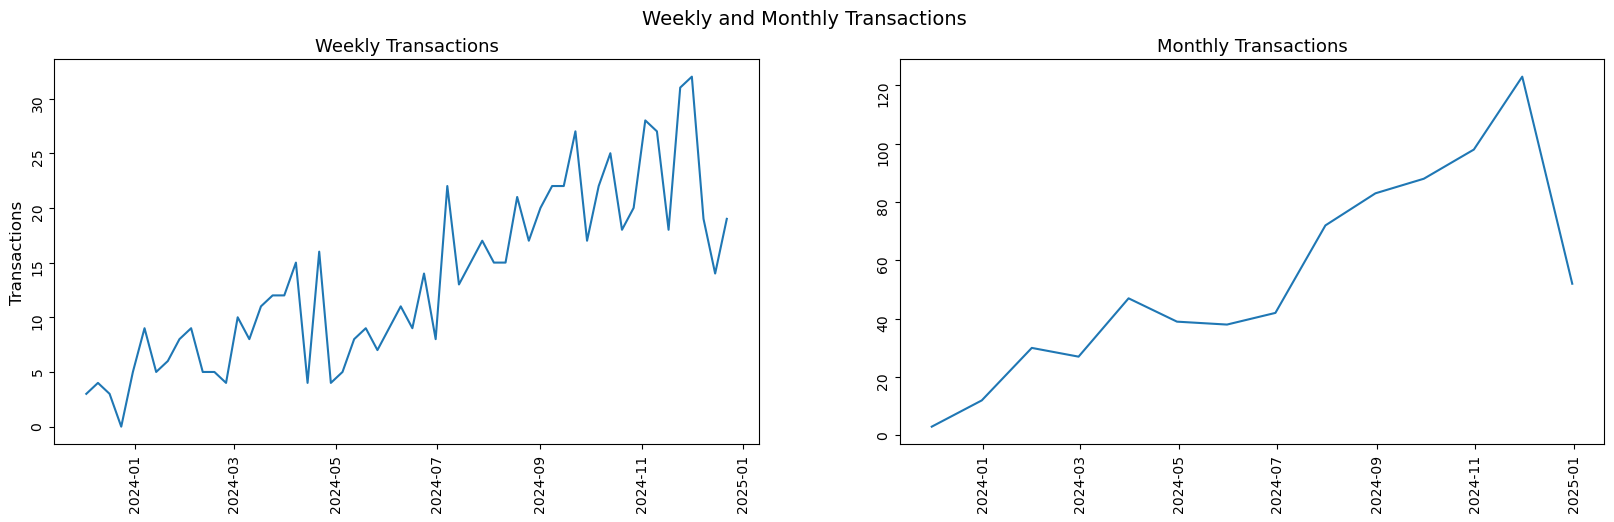

In [91]:
# Resample into weekly and monthly frequencies
weekly_transactions = time_df.resample('W').size()
monthly_transactions = time_df.resample('ME').size()

# Plot weekly and monthly frequencies
fig, ax = plt.subplots(1, 2, figsize=(20,5))

ax[0].plot(weekly_transactions.index, weekly_transactions.values)
ax[0].tick_params(rotation=90)
ax[0].set_ylabel('Transactions', fontsize=12)
ax[0].set_title('Weekly Transactions', fontsize=13)

ax[1].plot(monthly_transactions.index, monthly_transactions.values)
ax[1].tick_params(rotation=90)
ax[1].set_title('Monthly Transactions', fontsize=13)

fig.suptitle('Weekly and Monthly Transactions', fontsize=14)

plt.savefig(FIGURES_DIR / 'line_weekly_monthly_transactions.png', bbox_inches='tight')
plt.show()

According to the weekly transaction count, there may be some seasonality to transactions. The monthly lineplot demonstrates a clear upwards trend.

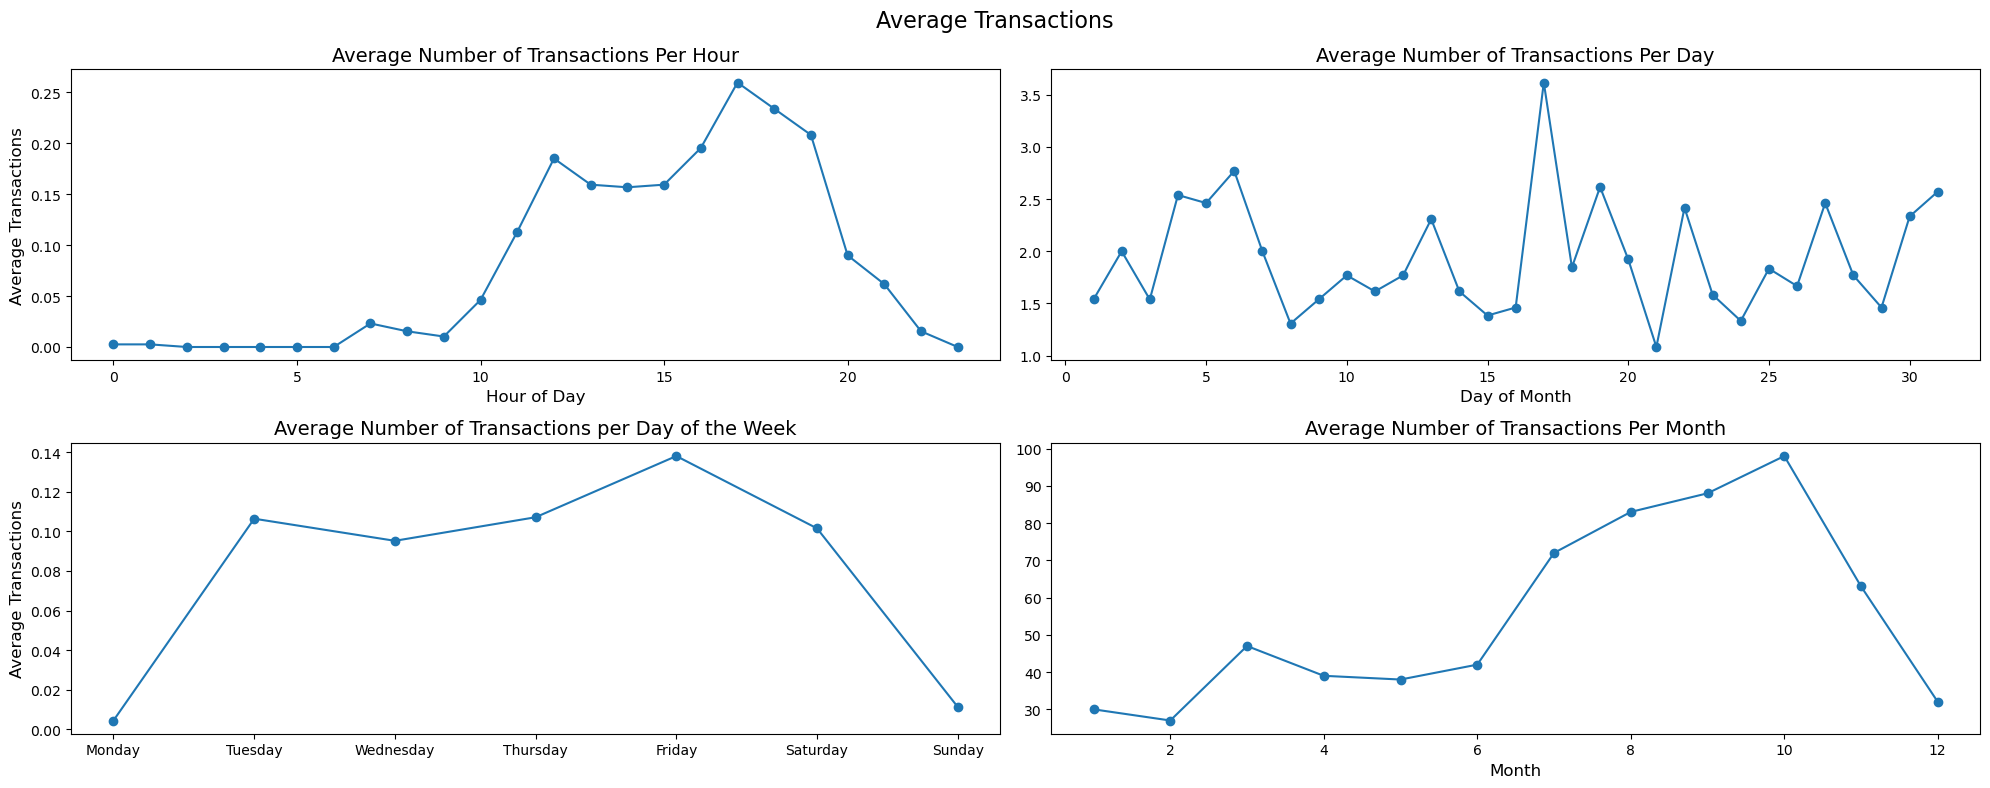

In [92]:
# Plot average number of transactions

# Hour of day
hourly_transactions = time_df.resample('h').size()
hourly_average = hourly_transactions.groupby(hourly_transactions.index.hour).mean()

# Day of month
daily_transactions = time_df.resample('D').size()
daily_average = daily_transactions.groupby(daily_transactions.index.day).mean()

# Day of week
day_week_average = hourly_transactions.groupby(hourly_transactions.index.dayofweek).mean()
day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_week_average.index = day_week_average.index.map(lambda x: day_names[x])

# Month of year
monthly_average = monthly_transactions.groupby(monthly_transactions.index.month).mean()

fig, ax = plt.subplots(2, 2, figsize=(20, 8))

ax[0][0].plot(hourly_average.index, hourly_average.values, marker='o')
ax[0][0].set_xlabel('Hour of Day', fontsize=12)
ax[0][0].set_ylabel('Average Transactions', fontsize=12)
ax[0][0].set_title('Average Number of Transactions Per Hour', fontsize=14)

ax[0][1].plot(daily_average.index, daily_average.values, marker='o')
ax[0][1].set_xlabel('Day of Month', fontsize=12)
ax[0][1].set_title('Average Number of Transactions Per Day', fontsize=14)

ax[1][0].plot(day_week_average.index, day_week_average.values, marker='o')
ax[1][0].set_ylabel('Average Transactions', fontsize=12)
ax[1][0].set_title('Average Number of Transactions per Day of the Week', fontsize=14)

ax[1][1].plot(monthly_average.index, monthly_average.values, marker='o')
ax[1][1].set_xlabel('Month', fontsize=12)
ax[1][1].set_title('Average Number of Transactions Per Month', fontsize=14)

fig.suptitle('Average Transactions', fontsize=16)

plt.tight_layout()
plt.savefig(FIGURES_DIR / 'line_avg_transactions.png', bbox_inches='tight')
plt.show()

## Conclusions

- Average number of transactions per hour peaks line up with lunchtime and dinnertime.
- Day of month does seem generally random, but average transactions per day of the week shows that slight seasonality could be due to peak transactions on Fridays.
- Average number of transactions per month follows the trend with a sudden dip starting in October.

# Transaction Net Sales

In [93]:
sales_time_df = pd.concat([time_df.reset_index(), trans_df[['Net Sales']]], axis=1).set_index('datetime')
sales_time_df.head()

,Net Sales
datetime,
2023-11-27 18:11:12,10.89
2023-11-27 13:37:08,88.56
2023-11-30 16:13:48,0.00
2023-12-05 16:12:32,44.16
2023-12-07 12:44:33,28.98


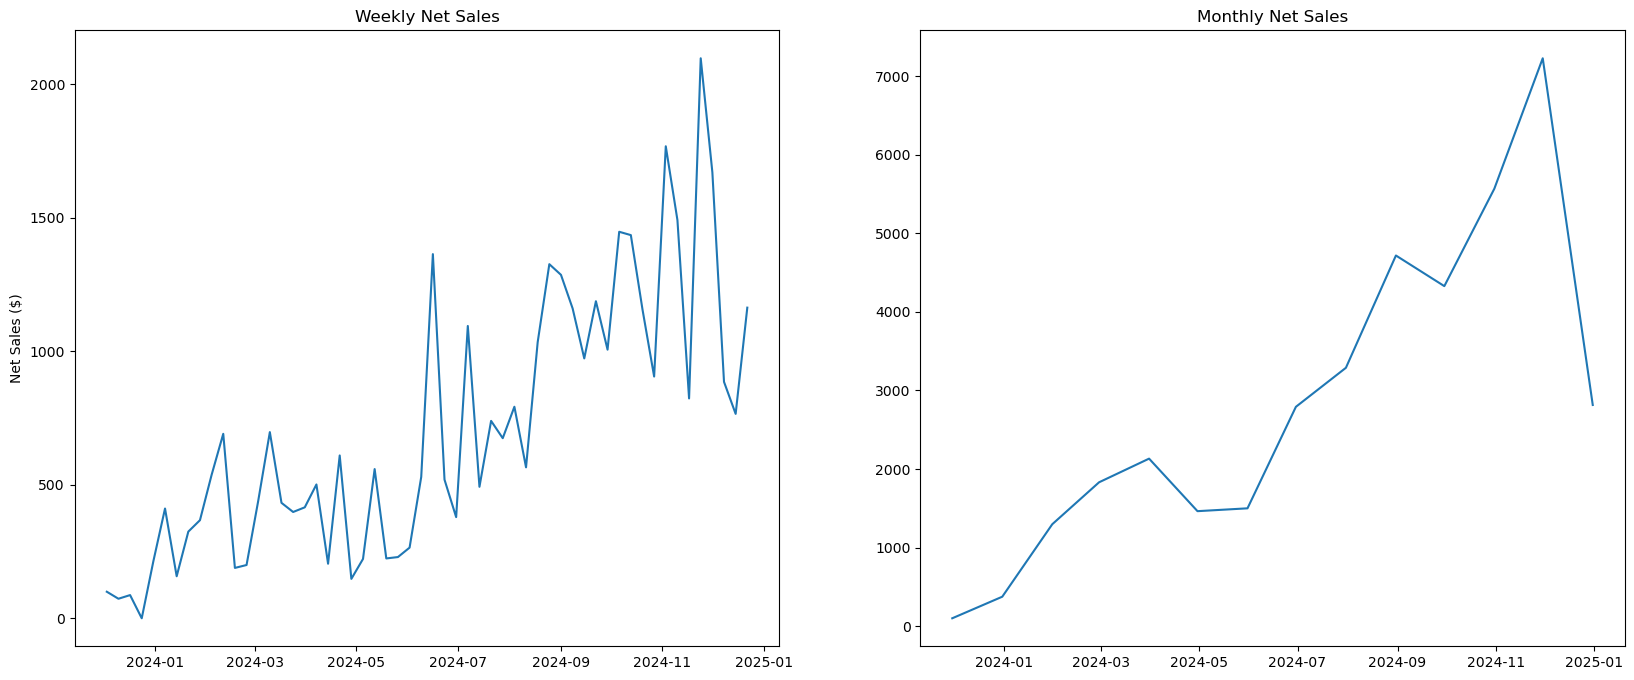

In [94]:
# Plot sales

weekly_transactions = sales_time_df.resample('W').sum()
monthly_transactions = sales_time_df.resample('ME').sum()

fig, ax = plt.subplots(1, 2, figsize=(20, 8))

ax[0].plot(weekly_transactions.index, weekly_transactions['Net Sales'])
ax[0].set_ylabel('Net Sales ($)')
ax[0].set_title('Weekly Net Sales')

ax[1].plot(monthly_transactions.index, monthly_transactions['Net Sales'])
ax[1].set_title('Monthly Net Sales')

plt.show()

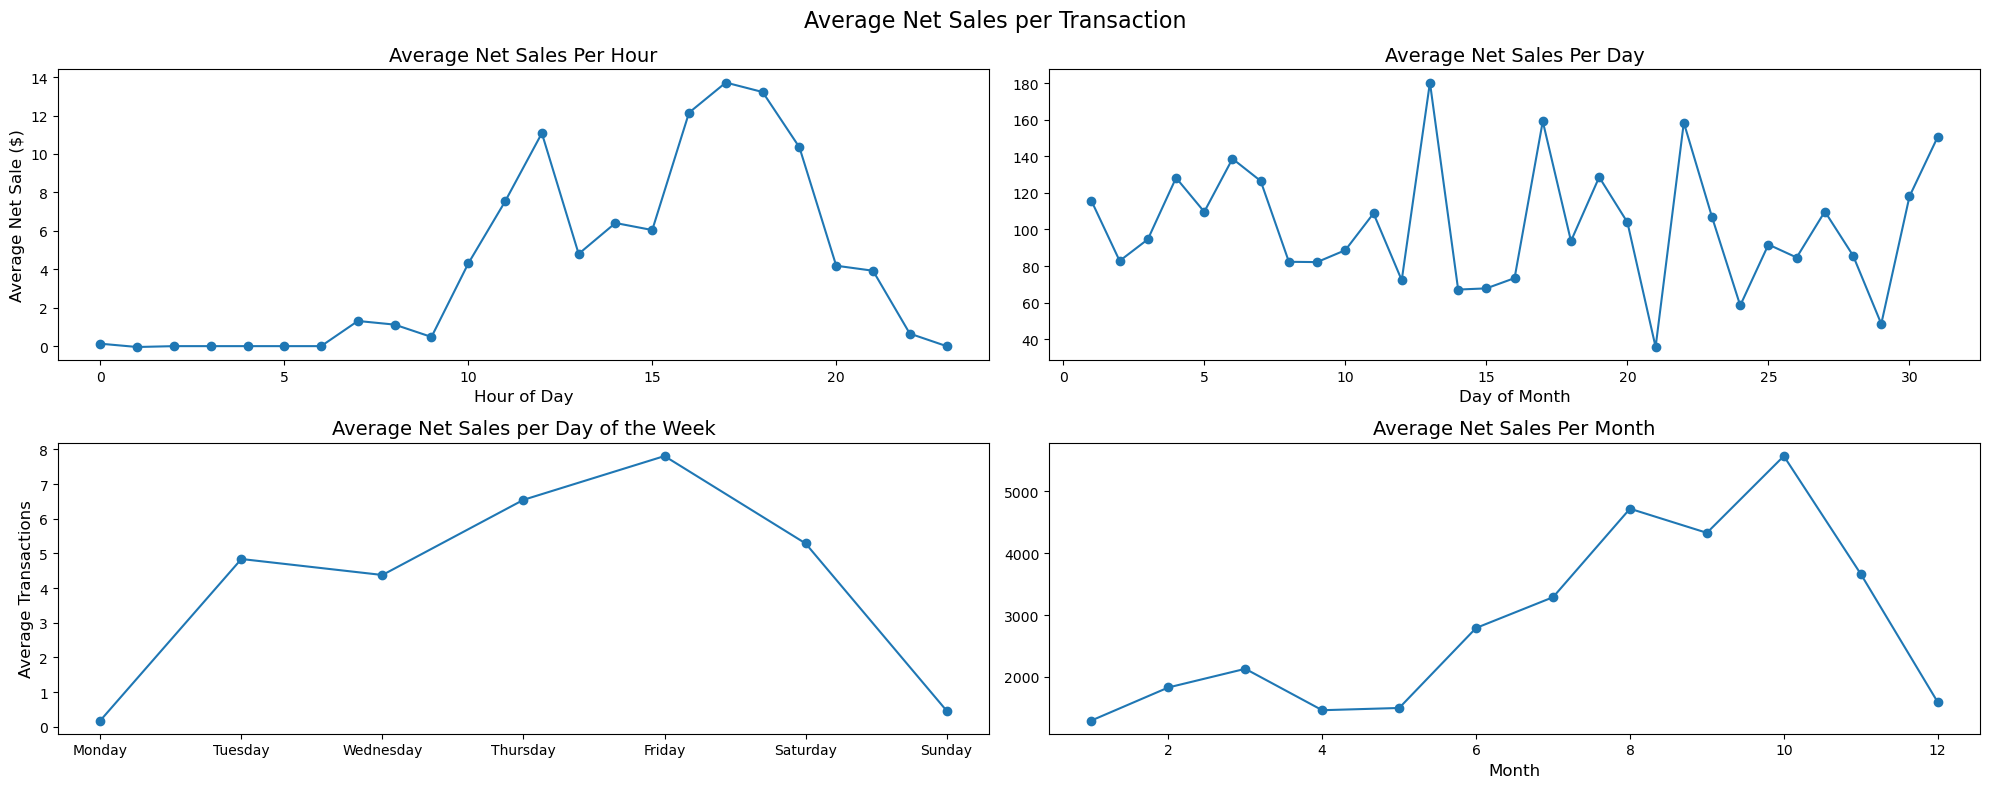

In [95]:
# Plot average number of transactions

# Hour of day
hourly_transactions = sales_time_df.resample('h').sum()
hourly_average = hourly_transactions.groupby(hourly_transactions.index.hour).mean()

# Day of month
daily_transactions = sales_time_df.resample('D').sum()
daily_average = daily_transactions.groupby(daily_transactions.index.day).mean()

# Day of week
day_week_average = hourly_transactions.groupby(hourly_transactions.index.dayofweek).mean()
day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_week_average.index = day_week_average.index.map(lambda x: day_names[x])

# Month of year
monthly_average = monthly_transactions.groupby(monthly_transactions.index.month).mean()

fig, ax = plt.subplots(2, 2, figsize=(20, 8))

ax[0][0].plot(hourly_average.index, hourly_average.values, marker='o')
ax[0][0].set_xlabel('Hour of Day', fontsize=12)
ax[0][0].set_ylabel('Average Net Sale ($)', fontsize=12)
ax[0][0].set_title('Average Net Sales Per Hour', fontsize=14)

ax[0][1].plot(daily_average.index, daily_average.values, marker='o')
ax[0][1].set_xlabel('Day of Month', fontsize=12)
ax[0][1].set_title('Average Net Sales Per Day', fontsize=14)

ax[1][0].plot(day_week_average.index, day_week_average.values, marker='o')
ax[1][0].set_ylabel('Average Transactions', fontsize=12)
ax[1][0].set_title('Average Net Sales per Day of the Week', fontsize=14)

ax[1][1].plot(monthly_average.index, monthly_average.values, marker='o')
ax[1][1].set_xlabel('Month', fontsize=12)
ax[1][1].set_title('Average Net Sales Per Month', fontsize=14)

fig.suptitle('Average Net Sales per Transaction', fontsize=16)

plt.tight_layout()
plt.savefig(FIGURES_DIR / 'line_avg_net_sales.png', bbox_inches='tight')
plt.show()